In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [2]:
mushroom_df = pd.read_csv("mushrooms.csv")

In [3]:
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
Y = mushroom_df['class']
X = mushroom_df.drop(['class'], axis=1)
X = pd.get_dummies(X)
Y = pd.get_dummies(Y)

In [5]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [6]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image
start_time = time.time()
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(X, Y)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.010384082794189453 seconds ---


In [7]:
cross_val_score(decision_tree, X, Y, cv=10)

array([0.18327183, 0.36408364, 0.45141451, 0.57072571, 0.68472906,
       0.67364532, 0.48768473, 0.21059113, 0.18226601, 0.44211823])

In [8]:
mushroom_df.columns[1:]

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

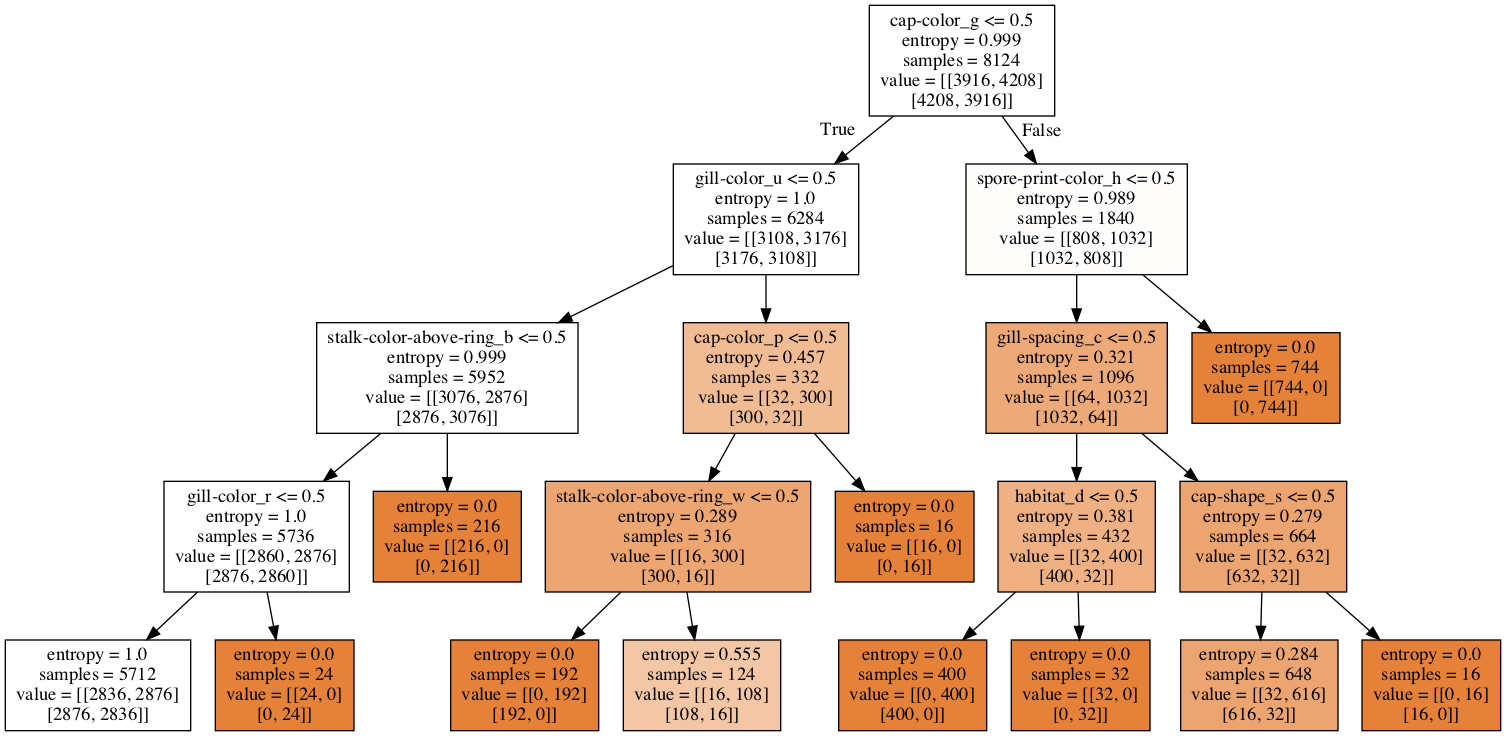

In [10]:
import pydotplus
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['p', 'e'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [11]:
start_time = time.time()
random_forest = ensemble.RandomForestClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
random_forest.fit(X,Y)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.03830695152282715 seconds ---


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [12]:
cross_val_score(random_forest, X, Y, cv=10)

array([0.62115621, 0.95940959, 0.98523985, 1.        , 0.99014778,
       0.96551724, 0.77463054, 0.91625616, 0.99876847, 0.98522167])

## Result

Decision Tree is more simple model to predict the class. so running time is shorter than the random forest model. However, the performance of the random forest is better based on the acurracy calcualted by cross validation.